In [1]:
CHARACTER = "МОНИКА"

main_characters = ['ДЖОУИ', 'МОНИКА', 'РЕЙЧЕЛ', 'РОСС', 'ФИБИ', 'ЧЕНДЛЕР']
labels_to_chars = dict(enumerate(main_characters))
chars_to_labels = {v: k for k, v in labels_to_chars.items()}
labels_to_chars, chars_to_labels

({0: 'ДЖОУИ', 1: 'МОНИКА', 2: 'РЕЙЧЕЛ', 3: 'РОСС', 4: 'ФИБИ', 5: 'ЧЕНДЛЕР'},
 {'ДЖОУИ': 0, 'МОНИКА': 1, 'РЕЙЧЕЛ': 2, 'РОСС': 3, 'ФИБИ': 4, 'ЧЕНДЛЕР': 5})

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/Alenush/style_transfer_sirius2021summer.git

Cloning into 'style_transfer_sirius2021summer'...
remote: Enumerating objects: 1807, done.
remote: Counting objects: 100% (1807/1807), done.
remote: Compressing objects: 100% (1138/1138), done.
remote: Total 1807 (delta 819), reused 1623 (delta 642), pack-reused 0
Receiving objects: 100% (1807/1807), 53.82 MiB | 14.14 MiB/s, done.
Resolving deltas: 100% (819/819), done.
Checking out files: 100% (657/657), done.


In [4]:
%%bash

cd style_transfer_sirius2021summer
git checkout master
git pull
cd -

Branch 'master' set up to track remote branch 'master' from 'origin'.
Already up to date.
/content


Switched to a new branch 'master'


In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm

tqdm.pandas()

In [6]:
#!g1.1
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [7]:
#!g1.1
df = pd.read_csv("style_transfer_sirius2021summer/data/train_data/ru/only_unique_phrases_ru.csv")
df

,label,sentence,base_sentence
0,5,Мамочка?,мамочка
1,4,Плюс мои деньги.,плюс мой деньга
2,5,Там все твои друзья и твои родители!,там всё твой друг и твой родитель
3,2,"Ну да, понимаете что?",ну да понимать что
4,3,"Нет, ребята, я имею в виду, что у меня клавишн...",нет ребята я иметь в вид что у я клавишный до ...
...,...,...,...
57188,0,"Да, и мы пошли бы проверить, но вы забрали наш...",да и мы послать бы проверить но вы забрать наш...
57189,2,Ну так почему бы вам просто не выключить?,ну так почему бы вы просто не выключить
57190,0,"Видишь ли, когда ты играешь, тебе нужно думать...",видеть ли когда ты играть ты нужно думать о та...
57191,3,"Эй, а где Рэйчел?",эй а где


In [8]:
df_person = df.copy()
idx = chars_to_labels[CHARACTER]
df_person["label"] = df_person["label"].progress_apply(lambda x: 1 if x == idx else 0)
df_person

100%|██████████| 57193/57193 [00:00<00:00, 602292.90it/s]


,label,sentence,base_sentence
0,0,Мамочка?,мамочка
1,0,Плюс мои деньги.,плюс мой деньга
2,0,Там все твои друзья и твои родители!,там всё твой друг и твой родитель
3,0,"Ну да, понимаете что?",ну да понимать что
4,0,"Нет, ребята, я имею в виду, что у меня клавишн...",нет ребята я иметь в вид что у я клавишный до ...
...,...,...,...
57188,0,"Да, и мы пошли бы проверить, но вы забрали наш...",да и мы послать бы проверить но вы забрать наш...
57189,0,Ну так почему бы вам просто не выключить?,ну так почему бы вы просто не выключить
57190,0,"Видишь ли, когда ты играешь, тебе нужно думать...",видеть ли когда ты играть ты нужно думать о та...
57191,0,"Эй, а где Рэйчел?",эй а где


In [9]:
import re

df_person["not_alpha_num_punct"] = df_person["sentence"].apply(lambda x: bool(re.match(r"[А-Яа-я0-9 _.,!\"\'/$]*", x)))
df_person

,label,sentence,base_sentence,not_alpha_num_punct
0,0,Мамочка?,мамочка,True
1,0,Плюс мои деньги.,плюс мой деньга,True
2,0,Там все твои друзья и твои родители!,там всё твой друг и твой родитель,True
3,0,"Ну да, понимаете что?",ну да понимать что,True
4,0,"Нет, ребята, я имею в виду, что у меня клавишн...",нет ребята я иметь в вид что у я клавишный до ...,True
...,...,...,...,...
57188,0,"Да, и мы пошли бы проверить, но вы забрали наш...",да и мы послать бы проверить но вы забрать наш...,True
57189,0,Ну так почему бы вам просто не выключить?,ну так почему бы вы просто не выключить,True
57190,0,"Видишь ли, когда ты играешь, тебе нужно думать...",видеть ли когда ты играть ты нужно думать о та...,True
57191,0,"Эй, а где Рэйчел?",эй а где,True


In [10]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 12.4 MB/s 
     |████████████████████████████████| 3.3 MB 47.9 MB/s 
     |████████████████████████████████| 895 kB 54.3 MB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |████████████████████████████████| 636 kB 44.9 MB/s 
     |████████████████████████████████| 109 kB 54.7 MB/s 
     |████████████████████████████████| 546 kB 48.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [11]:
df_person[df_person["label"] == 1]

,label,sentence,base_sentence,not_alpha_num_punct
22,1,"Здравствуйте, люди, которые здесь не живут.",здравствуйте человек который здесь не жить,True
36,1,"Я имею ввиду, это скручено!",я иметь ввиду это скрутить,True
56,1,"О, когда вы переживете разрыв, нам нужно идти ...",о когда вы пережить разрыв мы нужно идти по ма...,True
61,1,"Мы встречаемся всего пару недель, я имею в вид...",мы встречаться весь пара неделя я иметь в вид ...,True
63,1,Ну я-то поговорила и у нее точно будет ребенок.,ну ято поговорить и у она точно быть ребёнок,True
...,...,...,...,...
57170,1,"Росс, мы не занимались этим со средней школы.",мы не заниматься это с средний школа,True
57171,1,Два развода и Джоуи?!,два развод и,True
57175,1,Как ее звали?,как она звать,True
57181,1,"Расслабься, она уступит дорогу раньше тебя!",она уступить дорога ранний ты,True


In [12]:
f"Negative = {round(100 * df_person[df_person['label'] == 0].shape[0] / df_person.shape[0])}%"

'Negative = 84%'

In [13]:
df_pos_ = df_person[df_person['label'] == 1]
df_pos_ = df_pos_.sample(df_pos_.shape[0]).reset_index(drop=True)
df_pos_

,label,sentence,base_sentence,not_alpha_num_punct
0,1,Разве ты не собираешься.,разве ты не собираться,True
1,1,Если бы тебя там не было.,если бы ты там не быть,True
2,1,"Я не говорил, что твои песни недостаточно хороши.",я не говорить что твой песня недостаточно хороший,True
3,1,Так себе бы солгал?,так себя бы солгать,True
4,1,"Если ты женишься в Вегасе, ты женишься везде.",если ты жениться в вегас ты жениться везде,True
...,...,...,...,...
9025,1,Она моя двоюродная сестра.,она мой двоюродный сестра,True
9026,1,"Послушайте, я уверен, что папе все равно.",послушать я уверенный что папа всё равно,True
9027,1,"Как я показал тебе на Рождество, помнишь?",как я показать ты на рождество помнить,True
9028,1,"Тот шум, который вы только что издали?",тот шум который вы только что издали,True


In [14]:
df_neg_ = df_person[df_person['label'] == 0]
df_neg_ = df_neg_.sample(df_pos_.shape[0]).reset_index(drop=True)
df_neg_

,label,sentence,base_sentence,not_alpha_num_punct
0,0,Это похоже на конец эпохи!,это похоже на конец эпоха,True
1,0,"И вы не понимаете, о чем я говорю, потому что,...",и вы не понимать о чем я говорить потому что д...,True
2,0,"Что ж, неплохо.",что ж неплохо,True
3,0,"Привет, это дядя Джоуи!",привет это дядя,True
4,0,Почему тебе так сложно это понять?,почему ты так сложно это понять,True
...,...,...,...,...
9025,0,"Ладно, ладно, давай.",ладный ладный давать,True
9026,0,"Ну, понятно.",ну понятно,True
9027,0,"Может, госпожа поможет мне с этими подарками.",мочь госпожа помочь я с этот подарок,True
9028,0,Актер?!,актёр,True


In [15]:
result = pd.concat([df_pos_, df_neg_])
df_person = result.sample(n=result.shape[0]).reset_index(drop=True)[["sentence", "label"]]
df_person

,sentence,label
0,"Видимо, перед моим рождением у них была больша...",1
1,"Может, сначала расскажем родителям.",1
2,"Кроме того, что вы сказали, что они у вас есть?",0
3,"Добрый вечер, офицер.",0
4,Вы ооочень многого не знаете.,0
...,...,...
18055,"Почему бы тебе не использовать наши через зал,...",0
18056,"Э, твои волосы, раньше, твои волосы, ты сказал...",0
18057,Разве это не женская шляпа?,0
18058,"Ладно, Марджори, бей.",1


In [16]:
sentences = df_person.sentence.values
labels = df_person.label.values

In [17]:
from collections import Counter

Counter(labels)

Counter({0: 9030, 1: 9030})

In [18]:
n = 0
sents = []
lbls = []
for sent, label in zip(sentences, labels):
    if label == 1:
      while n != 3123:
          n += 1
          lbls.append(label)
          sents.append(sent)
    else:
        lbls.append(label)
        sents.append(sent)

print(len(sents), len(lbls))
Counter(lbls)

12153 12153


Counter({0: 9030, 1: 3123})

In [19]:
from sklearn.utils import shuffle

sentences, labels = shuffle(sents, lbls)
print(labels)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [21]:
from transformers import BertTokenizer
# using the low level BERT for our task.
tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased', do_lower_case=True)

# Printing the original sentence.
print('Original: ', sentences[0])

# Printing the tokenized sentence in form of list.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))
print(labels[0])

Downloading:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/642 [00:00<?, ?B/s]

Original:  Это испорченный или горький?
Tokenized:  ['это', 'испорч', '##енны', '##и', 'или', 'горь', '##ки', '##и', '?']
Token IDs:  [3998, 72134, 32463, 852, 3474, 51314, 2237, 852, 166]
0


In [22]:
input_ids = []
for sent in sentences:
    # so basically encode tokenizing , mapping sentences to thier token ids after adding special tokens.
    encoded_sent = tokenizer.encode(
        sent,                      # Sentence which are encoding.
        add_special_tokens = True, # Adding special tokens '[CLS]' and '[SEP]'
    )
    input_ids.append(encoded_sent)

In [23]:
from keras.preprocessing.sequence import pad_sequences

MAX_LEN = 128
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN , truncating="post", padding="post")

In [24]:
attention_masks = []

for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]
    attention_masks.append(att_mask)

In [25]:
from sklearn.model_selection import train_test_split

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, test_size=0.2)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels, test_size=0.2)

In [26]:
#changing the numpy arrays into tensors for working on GPU. 
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Deciding the batch size for training.
batch_size = 32

#DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# DataLoader for our validation(test) set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [33]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    "DeepPavlov/rubert-base-cased",
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False
)

# Running the model on GPU.
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [34]:
optimizer = AdamW(
    model.parameters(),
    lr = 1e-7,
    weight_decay=5e-2, # L2 Regularization
    eps = 1e-6 
)

In [35]:
#!g1.1
from transformers import get_linear_schedule_with_warmup
import time

epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [36]:
from tqdm import trange

import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [37]:
import random
import numpy as np

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()        

        output = model(b_input_ids, 
                      token_type_ids=None, 
                      attention_mask=b_input_mask, 
                      labels=b_labels
        )

        loss = output.loss
        total_train_loss += loss

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    print("")
    print("Running Validation...")

    t0 = time.time()
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():
            output = model(
                b_input_ids, 
                token_type_ids=None, 
                attention_mask=b_input_mask,
                labels=b_labels
            )
            
        # Accumulate the validation loss.
        loss = output.loss
        logits = output.logits
        total_eval_loss += loss
        
        label_ids = b_labels.cpu().numpy()
        logits = logits.detach().cpu().numpy()
        total_eval_accuracy += flat_accuracy(logits, label_ids)

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("Validation Loss: {0:.2f}".format(avg_val_loss))
    print("Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    304.    Elapsed: 0:00:50.
  Batch    80  of    304.    Elapsed: 0:01:40.
  Batch   120  of    304.    Elapsed: 0:02:30.
  Batch   160  of    304.    Elapsed: 0:03:20.
  Batch   200  of    304.    Elapsed: 0:04:10.
  Batch   240  of    304.    Elapsed: 0:05:01.
  Batch   280  of    304.    Elapsed: 0:05:51.

  Average training loss: 0.68
  Training epoch took: 0:06:21

Running Validation...
  Accuracy: 0.71
Validation Loss: 0.64
Validation took: 0:00:33

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    304.    Elapsed: 0:00:50.
  Batch    80  of    304.    Elapsed: 0:01:40.
  Batch   120  of    304.    Elapsed: 0:02:30.
  Batch   160  of    304.    Elapsed: 0:03:20.
  Batch   200  of    304.    Elapsed: 0:04:10.
  Batch   240  of    304.    Elapsed: 0:05:01.
  Batch   280  of    304.    Elapsed: 0:05:51.

  Average training loss: 0.64
  Training epoch took: 0:06:21

Running Validation...
  Accuracy: 0.74
Valid

In [39]:
chars_ru2en = {
    'ДЖОУИ'  : 'Joey',
    'МОНИКА' : 'Monica',
    'РЕЙЧЕЛ' : 'Rachel',
    'РОСС'   : 'Ross',
    'ФИБИ'   : 'Phoebe',
    'ЧЕНДЛЕР': 'Chandler',
}

In [40]:
chars_ru2en

{'ДЖОУИ': 'Joey',
 'МОНИКА': 'Monica',
 'РЕЙЧЕЛ': 'Rachel',
 'РОСС': 'Ross',
 'ФИБИ': 'Phoebe',
 'ЧЕНДЛЕР': 'Chandler'}

In [43]:
import pathlib

# The name of the task to train.I'm going to name this 'yelp'.
TASK_NAME = f'ru-{chars_ru2en[CHARACTER].lower()}'

ROOT_DIR = '/content/drive/MyDrive/FriendsClassifiers'

# The output directory where the fine-tuned model and checkpoints will be written.
OUTPUT_DIR = f'{ROOT_DIR}/outputs/{TASK_NAME}/'
pathlib.Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

CONFIG_NAME = "config.json"
WEIGHTS_NAME = f"{TASK_NAME}-pytorch_model.bin"
print(WEIGHTS_NAME)

ru-monica-pytorch_model.bin


In [44]:
import os
model_to_save = model.module if hasattr(model, 'module') else model  # Only save the model it-self

# If we save using the predefined names, we can load using `from_pretrained`
output_model_file = os.path.join(OUTPUT_DIR, WEIGHTS_NAME)
output_config_file = os.path.join(OUTPUT_DIR, CONFIG_NAME)

torch.save(model_to_save.state_dict(), output_model_file)
model_to_save.config.to_json_file(output_config_file)
tokenizer.save_vocabulary(OUTPUT_DIR)

('/content/drive/MyDrive/FriendsClassifiers/outputs/ru-monica/vocab.txt',)

In [45]:
loss_values = [float(stat['Training Loss'].cpu().detach().numpy()) for stat in training_stats]
loss_values

[0.6837306618690491, 0.6368255019187927, 0.6151077747344971]

(0.5807963311672211, 0.7180421054363251)

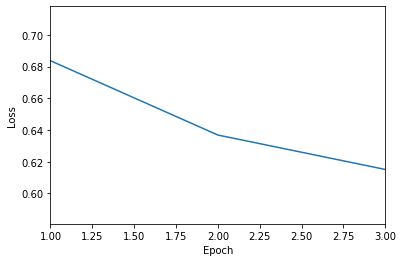

In [46]:
from matplotlib import pyplot as plt

plt.plot(range(1, epochs + 1), loss_values)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xlim(1, epochs)

loss_min = min(loss_values)
loss_max = max(loss_values)
variance = loss_max - loss_min
limit_min = loss_min - variance * 0.5
limit_max = loss_max + variance * 0.5
plt.ylim(limit_min, limit_max)